# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
no_cities = len(cities)

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [29]:
#test
#parameters = {"units": "metric",
#                    "appid": api_key,
#                    "q": "London"}
#requests.get(url, params=parameters).json()

{'coord': {'lon': -0.13, 'lat': 51.51},
 'weather': [{'id': 500,
   'main': 'Rain',
   'description': 'light rain',
   'icon': '10n'}],
 'base': 'stations',
 'main': {'temp': 2.95,
  'pressure': 1001,
  'humidity': 75,
  'temp_min': 1.11,
  'temp_max': 5},
 'visibility': 10000,
 'wind': {'speed': 4.6, 'deg': 240},
 'rain': {'3h': 2.935},
 'clouds': {'all': 0},
 'dt': 1551761331,
 'sys': {'type': 1,
  'id': 1414,
  'message': 0.0072,
  'country': 'GB',
  'sunrise': 1551767841,
  'sunset': 1551808054},
 'id': 2643743,
 'name': 'London',
 'cod': 200}

In [5]:
#test data: citi = ["Paris", "London", "Oslo", "Beijing"]
data = []
url = "http://api.openweathermap.org/data/2.5/weather?"

print("Beginning Data Retrieval\n-----------------------------")
for city in cities:
    parameters = {"units": "metric",
                    "appid": api_key,
                    "q": city}
    response = requests.get(url, params=parameters).json()
    try:
        lon = response['coord']['lon']
        lat = response['coord']['lat']
        country = response['sys']['country']
        temp = response['main']['temp_max']
        cloudiness = response['clouds']['all']
        date = response['dt']
        humidity = response['main']['humidity']
        wind = response['wind']['speed']
        
    except:
        print("City not found. Skipping...")
    else:
        print(f"processing record of set {cities.index(city)} of {no_cities} | {city}")
        data.append( {"city": city,
                "country": country,
                "cloudiness": cloudiness,
                "date": date,
                "humidity": humidity,
                "lat": lat,
                "lng": lon,
                "max_temp": temp,
                "wind_speed": wind})

Beginning Data Retrieval
-----------------------------
processing record of set 0 of 634 | jamestown
processing record of set 1 of 634 | terney
processing record of set 2 of 634 | llanes
processing record of set 3 of 634 | georgetown
processing record of set 4 of 634 | zemio
City not found. Skipping...
processing record of set 6 of 634 | busselton
processing record of set 7 of 634 | vila velha
processing record of set 8 of 634 | faanui
processing record of set 9 of 634 | albany
processing record of set 10 of 634 | mataura
City not found. Skipping...
processing record of set 12 of 634 | hays
processing record of set 13 of 634 | cidreira
processing record of set 14 of 634 | chapais
processing record of set 15 of 634 | anamur
processing record of set 16 of 634 | esperance
processing record of set 17 of 634 | rikitea
processing record of set 18 of 634 | raudeberg
processing record of set 19 of 634 | taltal
processing record of set 20 of 634 | cape town
processing record of set 21 of 634 | 

processing record of set 180 of 634 | the valley
processing record of set 181 of 634 | presidencia roque saenz pena
City not found. Skipping...
processing record of set 183 of 634 | nemuro
processing record of set 184 of 634 | sapa
processing record of set 185 of 634 | avarua
processing record of set 186 of 634 | lorengau
City not found. Skipping...
processing record of set 188 of 634 | micheweni
processing record of set 189 of 634 | port hedland
City not found. Skipping...
processing record of set 191 of 634 | zheleznodorozhnyy
processing record of set 192 of 634 | te anau
processing record of set 193 of 634 | lasa
processing record of set 194 of 634 | pelaya
processing record of set 195 of 634 | torbay
processing record of set 196 of 634 | kaseda
processing record of set 197 of 634 | half moon bay
processing record of set 198 of 634 | hilo
City not found. Skipping...
processing record of set 200 of 634 | arraial do cabo
processing record of set 201 of 634 | portales
processing record

processing record of set 359 of 634 | banjar
processing record of set 360 of 634 | norman wells
processing record of set 361 of 634 | abu kamal
processing record of set 362 of 634 | sungairaya
processing record of set 363 of 634 | petropavlovsk-kamchatskiy
processing record of set 364 of 634 | asekeyevo
processing record of set 365 of 634 | isangel
processing record of set 366 of 634 | xining
processing record of set 367 of 634 | gravdal
processing record of set 368 of 634 | mount isa
processing record of set 369 of 634 | araouane
processing record of set 370 of 634 | ambon
processing record of set 371 of 634 | letterkenny
processing record of set 372 of 634 | alice springs
processing record of set 373 of 634 | ranong
processing record of set 374 of 634 | katubao
processing record of set 375 of 634 | tevaitoa
processing record of set 376 of 634 | kahului
processing record of set 377 of 634 | rincon
processing record of set 378 of 634 | kudat
processing record of set 379 of 634 | kamais

processing record of set 540 of 634 | loikaw
processing record of set 541 of 634 | itarema
processing record of set 542 of 634 | honiara
processing record of set 543 of 634 | waiouru
processing record of set 544 of 634 | brae
City not found. Skipping...
processing record of set 546 of 634 | peniche
processing record of set 547 of 634 | mahajanga
processing record of set 548 of 634 | loandjili
processing record of set 549 of 634 | marck
processing record of set 550 of 634 | kulhudhuffushi
processing record of set 551 of 634 | los llanos de aridane
City not found. Skipping...
processing record of set 553 of 634 | sawakin
City not found. Skipping...
processing record of set 555 of 634 | makakilo city
City not found. Skipping...
processing record of set 557 of 634 | baykit
processing record of set 558 of 634 | acapulco
processing record of set 559 of 634 | teya
City not found. Skipping...
processing record of set 561 of 634 | pergamino
processing record of set 562 of 634 | oussouye
City no

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
df = pd.DataFrame(data)
df.count()

city          570
cloudiness    570
country       570
date          570
humidity      570
lat           570
lng           570
max_temp      570
wind_speed    570
dtype: int64

In [7]:
df.to_csv(output_data_file)

In [8]:
df.head()

,city,cloudiness,country,date,humidity,lat,lng,max_temp,wind_speed
0,jamestown,24,AU,1551928564,49,-33.21,138.60,19.54,4.37
1,terney,0,RU,1551928824,77,45.05,136.61,-0.69,4.97
2,llanes,0,ES,1551928824,60,43.42,-4.75,11.11,2.52
3,georgetown,20,GY,1551924000,88,6.80,-58.16,25.00,1.00
4,zemio,68,CF,1551928825,89,5.02,25.13,20.92,2.22


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

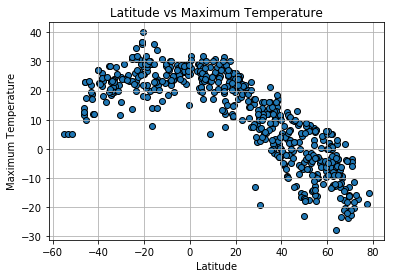

In [32]:
lat_vs_temp = plt.scatter(df['lat'], df['max_temp'], edgecolors='black')
plt.title("Latitude vs Maximum Temperature")
plt.xlabel("Latitude")
plt.ylabel("Maximum Temperature") 
plt.grid()
plt.savefig("Latitude Versus Temperature")
np.polyfit(df['lat'], df['max_temp'], 2)

display()

In [57]:
x = df['lat']
y = df['max_temp']
z = np.polyfit(x, y, 2) 
p = np.poly1d(z)
x_new = np.linspace(x.iloc[0], x.iloc[-1], 100)
y_new = p(x_new)
#plt.plot(df['lat'],df['max_temp'], 'yo', df['lat'], z(df['lat']))
x_new

array([-33.21      , -33.10818182, -33.00636364, -32.90454545,
       -32.80272727, -32.70090909, -32.59909091, -32.49727273,
       -32.39545455, -32.29363636, -32.19181818, -32.09      ,
       -31.98818182, -31.88636364, -31.78454545, -31.68272727,
       -31.58090909, -31.47909091, -31.37727273, -31.27545455,
       -31.17363636, -31.07181818, -30.97      , -30.86818182,
       -30.76636364, -30.66454545, -30.56272727, -30.46090909,
       -30.35909091, -30.25727273, -30.15545455, -30.05363636,
       -29.95181818, -29.85      , -29.74818182, -29.64636364,
       -29.54454545, -29.44272727, -29.34090909, -29.23909091,
       -29.13727273, -29.03545455, -28.93363636, -28.83181818,
       -28.73      , -28.62818182, -28.52636364, -28.42454545,
       -28.32272727, -28.22090909, -28.11909091, -28.01727273,
       -27.91545455, -27.81363636, -27.71181818, -27.61      ,
       -27.50818182, -27.40636364, -27.30454545, -27.20272727,
       -27.10090909, -26.99909091, -26.89727273, -26.79

#### Latitude vs. Humidity Plot

In [50]:
x

0     -33.21
1      45.05
2      43.42
3       6.80
4       5.02
5     -33.64
6      -3.71
7     -16.48
8      42.65
9     -46.19
10     38.88
11    -30.17
12     49.78
13     36.08
14     10.24
15    -23.12
16     61.99
17    -25.41
18    -33.93
19     35.45
20    -46.43
21     54.11
22     70.86
23     46.81
24     39.95
25    -23.50
26     47.77
27     64.25
28      4.94
29    -43.30
       ...  
540    -8.35
541    50.23
542   -31.62
543    18.62
544    59.66
545    42.13
546   -32.25
547     6.46
548    65.73
549    -5.81
550   -21.35
551    18.25
552    41.84
553    -4.26
554    54.36
555    32.65
556   -36.31
557   -45.58
558    68.61
559    -0.90
560   -39.94
561    31.35
562    28.89
563    26.54
564   -15.51
565   -31.43
566   -13.44
567   -40.02
568    15.13
569   -23.13
Name: lat, Length: 570, dtype: float64

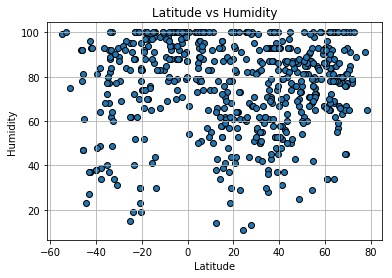

In [26]:
lat_vs_temp = plt.scatter(df['lat'], df['humidity'], edgecolors='black')
plt.title("Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity") 
plt.grid()
plt.savefig("Latitude Versus Humidity Plot")
display()

#### Latitude vs. Cloudiness Plot

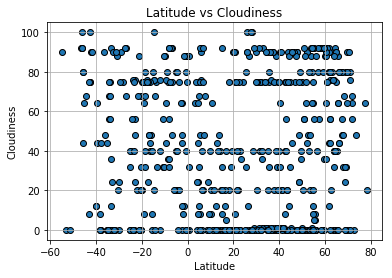

In [27]:
lat_vs_temp = plt.scatter(df['lat'], df['cloudiness'], edgecolors='black')
plt.title("Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness") 
plt.grid()
plt.savefig("Latitude Versus Cloudiness Plot")
display()

#### Latitude vs. Wind Speed Plot

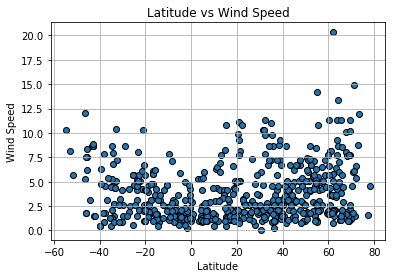

In [28]:
lat_vs_temp = plt.scatter(df['lat'], df['wind_speed'], edgecolors='black')
plt.title("Latitude vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed") 
plt.grid()
plt.savefig("Latitude Versus Wind Speed")
display()